In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
import pickle
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
all_match = pd.read_csv('/srv/one/hperk4/decals_eco_resolve_allmatches.csv')

In [3]:
all_match = all_match.dropna(subset = ['z_phot_median'])
all_match = all_match[all_match['absrmag'] < -17]
all_match = all_match[all_match['r50'] > 0]
#before cuts, 14648 galaxies. after, 13772

In [4]:
def gauss(xval, mean, sigma):
    return (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((xval - mean) / sigma) ** 2)

In [5]:
photo_z = all_match['z_phot_median']
spec_z = all_match['cz']/3e5
e_tab = all_match['z_phot_std']
rmag = all_match['rmag']
absrmag = all_match['absrmag']

#this is using the RESOLVE/eco r50 and magnitudes
x = (np.pi*(all_match['r50'])**2)
surfbright = rmag + 2.5*(np.log10(x))

delta_z = (photo_z - spec_z)
all_match['delta_z'] = delta_z

ratio_0 = delta_z/e_tab

#### No offset correction, no scaled error

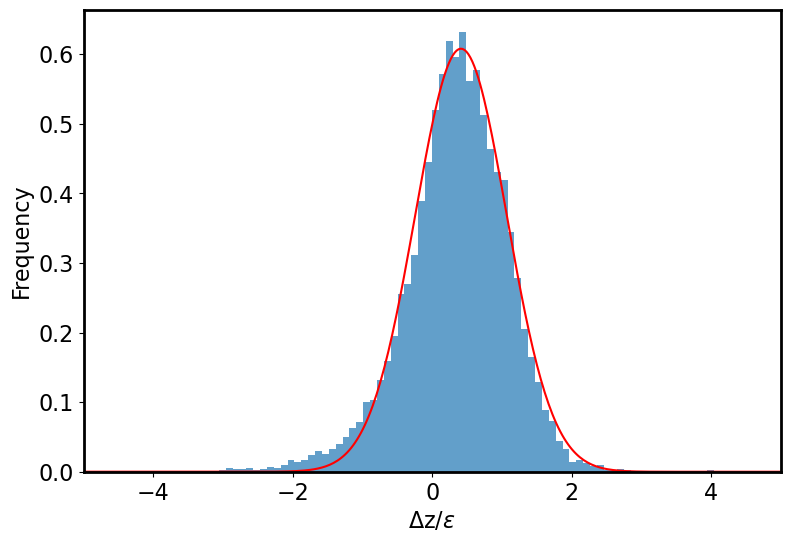

σ = 0.6563100935579349
mean = 0.4112533848731635


In [6]:
hist, bins = np.histogram(ratio_0, bins=100, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = curve_fit(gauss, bin_centers, hist)

mean, sigma = popt

xval = np.linspace(-14, 14, 1000)

plt.figure(figsize = (9,6))
plt.hist(ratio_0, bins=bins, density=True, alpha=0.7, label='$\Delta$z/$\epsilon$')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z/$\epsilon$', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
#plt.title('all values of surface brightness')
plt.xlim(-5,5)
#plt.legend()
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)



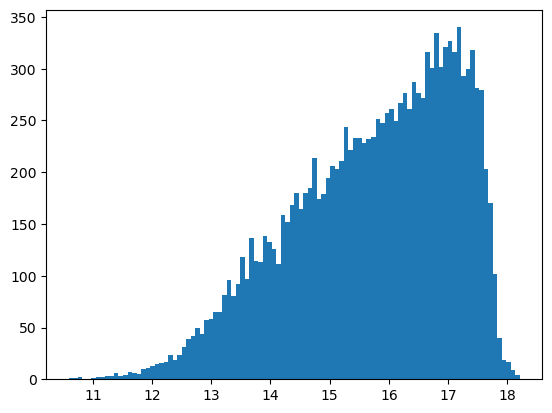

In [7]:
plt.hist(rmag, bins = 100)
plt.show()

In [8]:
bin_12_13 = all_match[(rmag > 12) & (rmag < 13)]
bin_13_14 = all_match[(rmag > 13) & (rmag < 14)]
bin_14_15 = all_match[(rmag > 14) & (rmag < 15)]
bin_15_16 = all_match[(rmag > 15) & (rmag < 16)]
bin_16_17 = all_match[(rmag > 16) & (rmag < 17)]
bin_17_18 = all_match[(rmag > 17) & (rmag < 18)]

### Will first fix the offset, looking at (photz - specz)

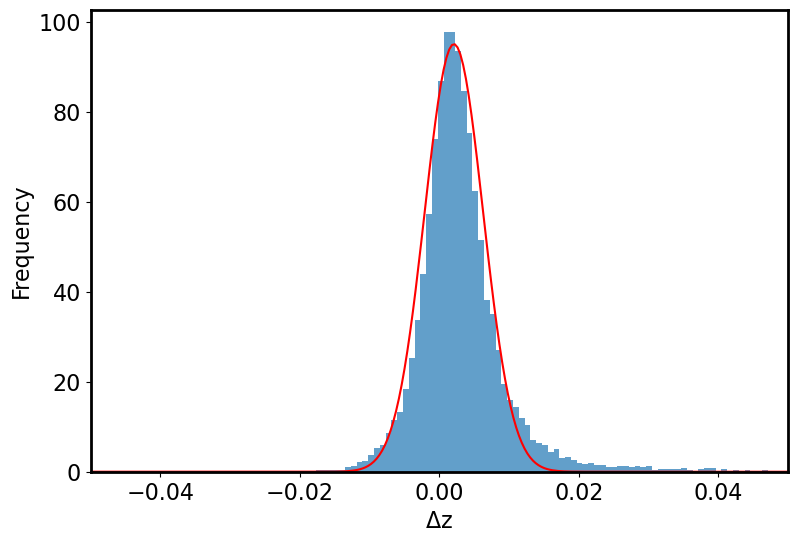

σ = 0.004194504231847332
mean = 0.0020775553590719484


In [9]:
# Calculate histogram
hist, bins = np.histogram(delta_z, bins=1000, density=True)

# Calculate bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Fit the Gaussian using curve_fit
popt, pcov = curve_fit(gauss, bin_centers, hist)

# Extract the optimized parameters
mean, sigma = popt

xval = np.linspace(-0.2, 0.2, 1000)

plt.figure(figsize = (9,6))
plt.hist(delta_z, bins=bins, density=True, alpha=0.7, label='$\Delta$z')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
#plt.title('all values of surface brightness')
plt.xlim(-0.05,0.05)
#plt.legend()
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)

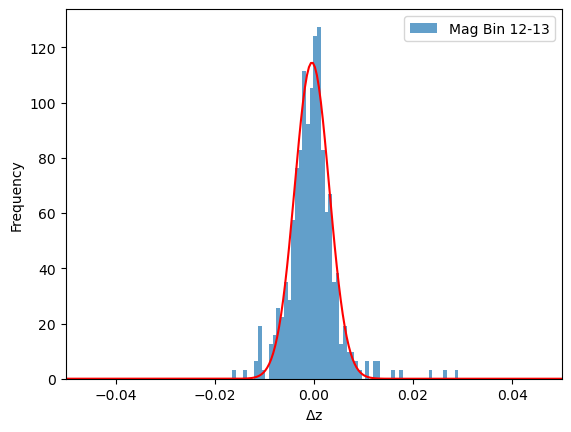

σ = 0.00348207471830365
mean = -0.0003957230099297951
quadrature error: 0.00514124


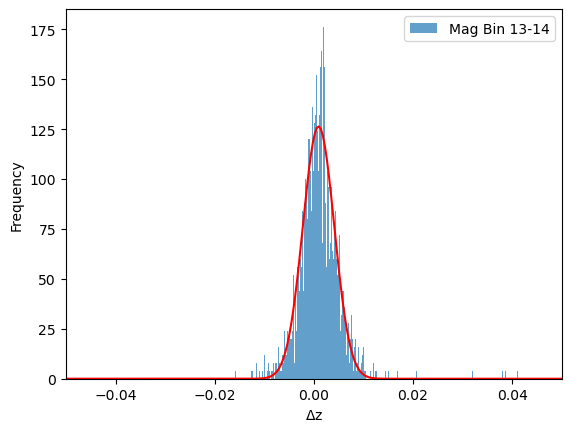

σ = 0.0031567238646022272
mean = 0.0009414097138160486
quadrature error: 0.00465405


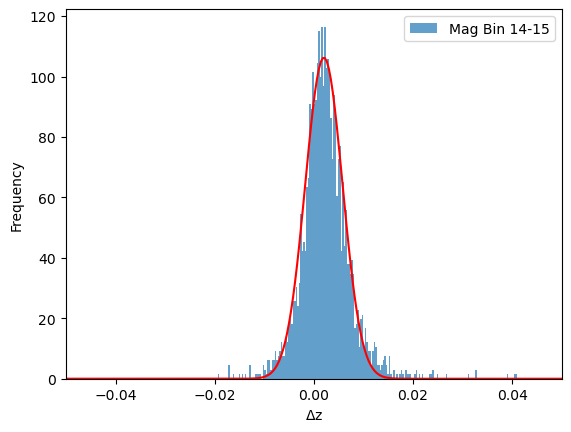

σ = 0.003753737968868282
mean = 0.0020132814084004727
quadrature error: 0.00558303


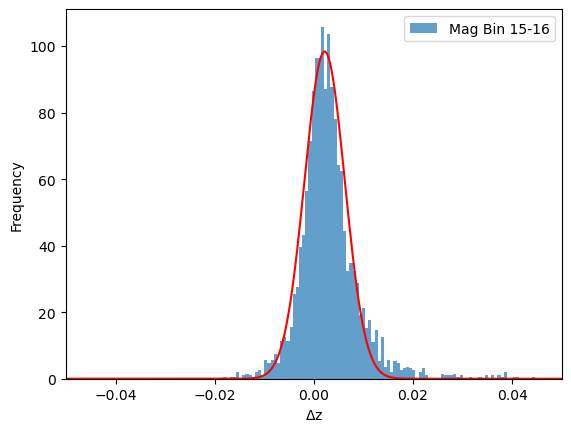

σ = 0.004052902858220323
mean = 0.002162562251822116
quadrature error: 0.00643588


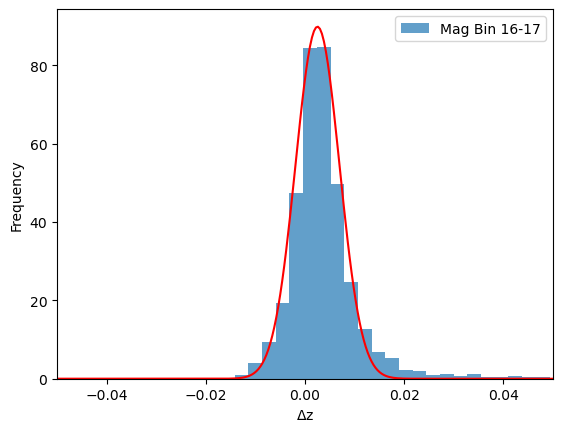

σ = 0.00444104798574368
mean = 0.0025103230192169116
quadrature error: 0.00692083


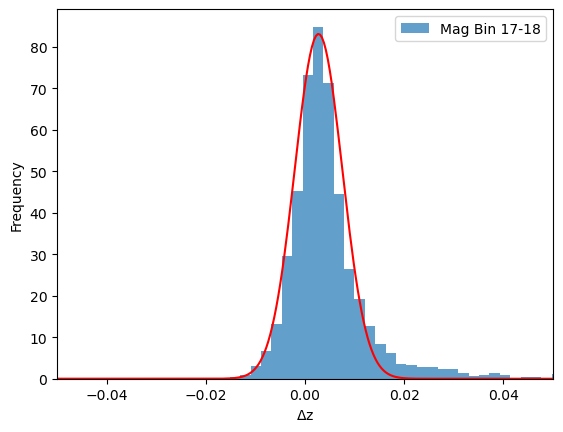

σ = 0.004801417651497417
mean = 0.0027179658070427644
quadrature error: 0.00830792


In [10]:
bincenters = [12.5, 13.5,14.5,15.5,16.5,17.5]
dfs = [bin_12_13, bin_13_14, bin_14_15, bin_15_16, bin_16_17, bin_17_18]
label = ['Mag Bin 12-13','Mag Bin 13-14','Mag Bin 14-15','Mag Bin 15-16','Mag Bin 16-17','Mag Bin 17-18']
mean_values = []
median_values = []
quad_errs = []
for df, lbl in zip(dfs, label):
    hist, bins = np.histogram(df['delta_z'], bins=1000, density=True)

    bin_centers = (bins[:-1] + bins[1:]) / 2

    popt, pcov = curve_fit(gauss, bin_centers, hist)

    mean, sigma = popt

    xval = np.linspace(-0.2, 0.2, 1000)

    plt.hist(df['delta_z'], bins=300, density=True, alpha=0.7, label=lbl)
    plt.plot(xval, gauss(xval, mean, sigma), color='red')
    plt.xlabel('$\Delta$z')
    plt.ylabel('Frequency')
    plt.xlim(-0.05,0.05)
    plt.legend()
    plt.show()
    print('\u03C3 =', sigma)
    print('mean =', mean)

    median = np.median(df['delta_z'])
    percent16 = np.percentile(df['delta_z'], 16)
    percent84 = np.percentile(df['delta_z'], 84)
    upper = percent84 - median
    lower = median - percent16
    quad_err = np.sqrt((upper)**2 + (lower)**2)
    print("quadrature error: %0.8f" %quad_err)
    
    mean_values.append(mean)
    median_values.append(median)
    quad_errs.append(quad_err)   


median = 0.00067441 * rmag + -0.00824593


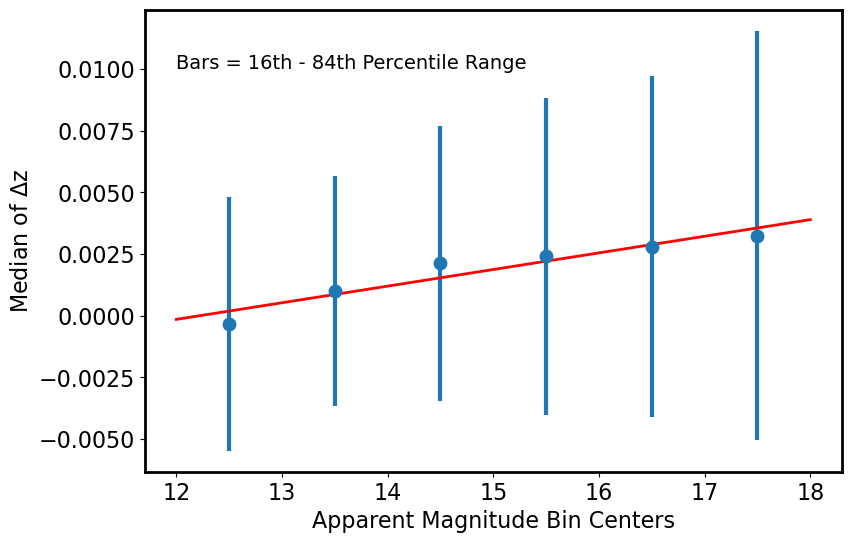

In [11]:
def line(x,a,b):
    y = a*x + b
    return y

x = np.array(bincenters)
y = np.array(median_values)
y_err = quad_errs

params, _ = curve_fit(line, x, y)

a_fit, b_fit = params

equation = f"median = {a_fit:.8f} * rmag + {b_fit:.8f}"
print(equation)

x_fit = np.linspace(12, 18, 100)
y_fit = line(x_fit, a_fit, b_fit)

plt.figure(figsize = (9,6))
plt.errorbar(x, y, yerr = y_err, fmt = 'o', linewidth = 3, markersize = 9, label = 'Data with percentiles')
plt.plot(x_fit, y_fit, color='red', linewidth = 2, label='Fitted Curve')
plt.xlabel('Apparent Magnitude Bin Centers', fontsize = 16)
plt.ylabel('Median of $\Delta$z', fontsize = 16)
plt.annotate('Bars = 16th - 84th Percentile Range', xy = (12,0.01), fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.show()

panelbstuff = {'x':x, 'y':y, 'y_err':y_err, 'x_fit':x_fit, 'y_fit':y_fit}
pickle.dump(panelbstuff,open('panelbstuff.pkl','wb'))
#bars are from 16th to 84th percentile

In [12]:
offset = a_fit * rmag + b_fit
photoz_corr = photo_z - offset
delta_z_corr = photoz_corr - spec_z

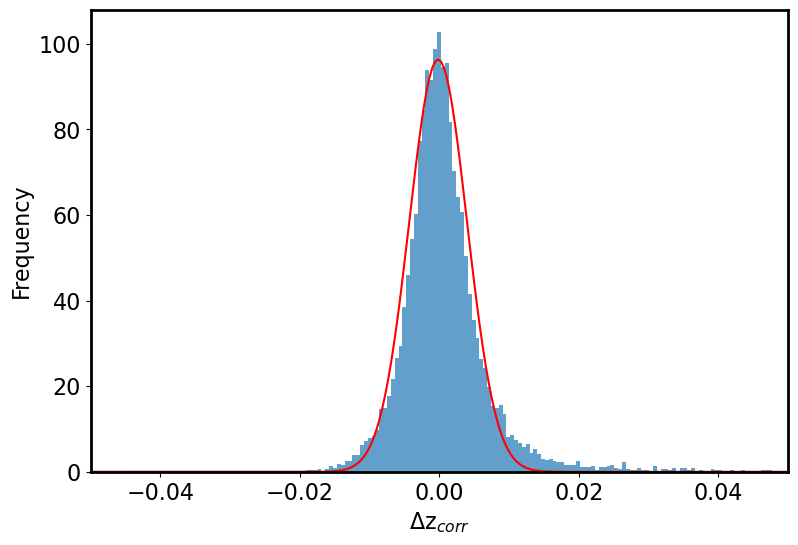

σ = 0.004141579238707002
mean = -0.0001814109198894116


In [13]:
hist, bins = np.histogram(delta_z_corr, bins=1500, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = curve_fit(gauss, bin_centers, hist)

mean, sigma = popt

xval = np.linspace(-0.2, 0.2, 1000)

plt.figure(figsize = (9,6))
plt.hist(delta_z_corr, bins=bins, density=True, alpha=0.7, label='$\Delta$z')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z$_{corr}$', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlim(-0.05,0.05)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)

### Now, with the corrected photo z, do the e_tab correction with this corrected delta_z_corr

In [14]:
err_ratio = (delta_z_corr)/e_tab
all_match['err_ratio'] = err_ratio

In [15]:
bin_12_13 = all_match[(rmag > 12) & (rmag < 13)]
bin_13_14 = all_match[(rmag > 13) & (rmag < 14)]
bin_14_15 = all_match[(rmag > 14) & (rmag < 15)]
bin_15_16 = all_match[(rmag > 15) & (rmag < 16)]
bin_16_17 = all_match[(rmag > 16) & (rmag < 17)]
bin_17_18 = all_match[(rmag > 17) & (rmag < 18)]

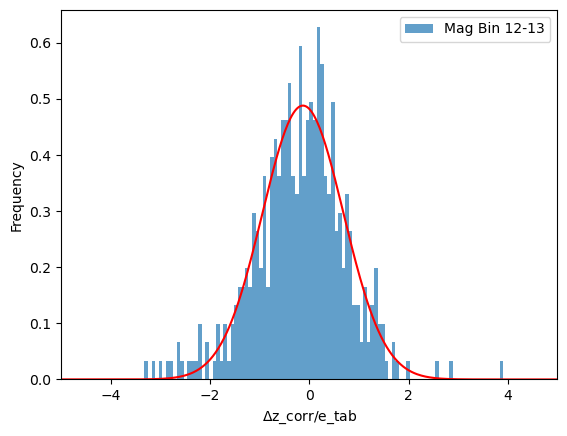

σ = 0.817708863572243
mean = -0.1303272017696071
standard dev =  0.9268473247784262


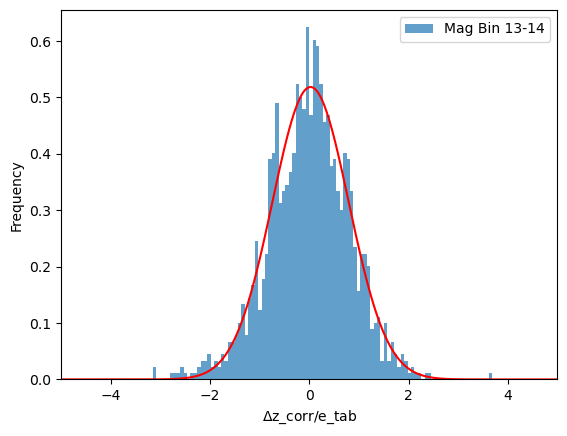

σ = 0.7696309176232539
mean = 0.023091277935975672
standard dev =  0.8150674528906282


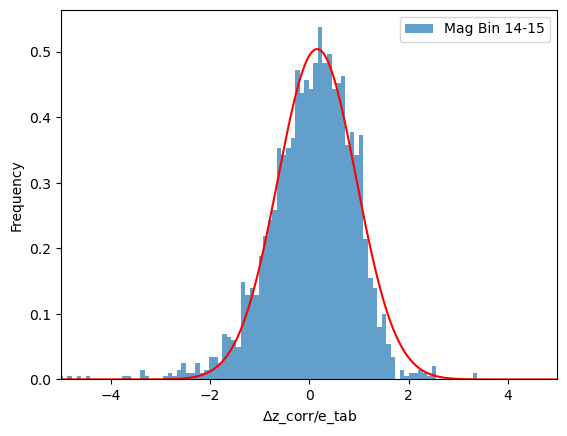

σ = 0.7912628889622217
mean = 0.15566747226630384
standard dev =  0.8695780140963624


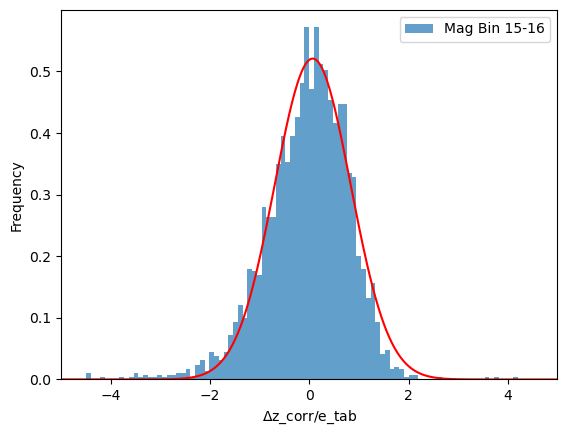

σ = 0.7662205641846241
mean = 0.06581317289122855
standard dev =  0.836184694202885


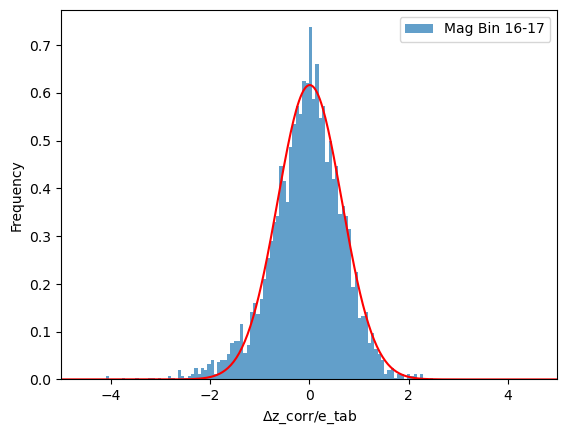

σ = 0.6474178246791237
mean = 0.007014314714081872
standard dev =  0.7257409299730072


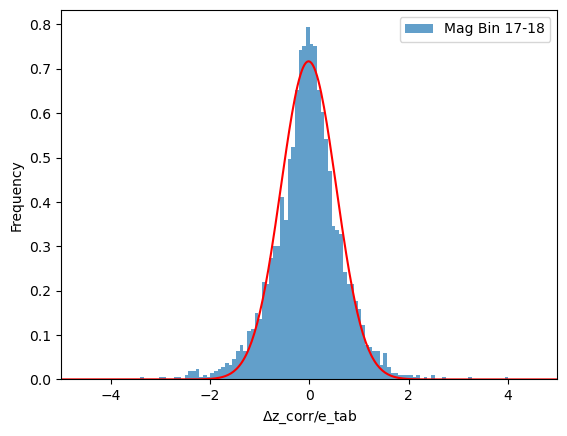

σ = 0.556445474804657
mean = -0.01670789273678756
standard dev =  0.6684038717185468


In [16]:
dfs = [bin_12_13, bin_13_14, bin_14_15, bin_15_16, bin_16_17, bin_17_18]
label = ['Mag Bin 12-13','Mag Bin 13-14','Mag Bin 14-15','Mag Bin 15-16','Mag Bin 16-17','Mag Bin 17-18']
sigma_values = []
for df, lbl in zip(dfs, label):
    hist, bins = np.histogram(df['err_ratio'], bins=100, density=True)

    bin_centers = (bins[:-1] + bins[1:]) / 2

    popt, pcov = curve_fit(gauss, bin_centers, hist)

    mean, sigma = popt

    xval = np.linspace(-14, 14, 1000)

    plt.hist(df['err_ratio'], bins=bins, density=True, alpha=0.7, label=lbl)
    plt.plot(xval, gauss(xval, mean, sigma), color='red')
    plt.xlabel('$\Delta$z_corr/e_tab')
    plt.ylabel('Frequency')
    plt.xlim(-5,5)
    plt.legend()
    plt.show()
    
    stddev = np.std(df['err_ratio'])
    print('\u03C3 =', sigma)
    print('mean =', mean)
    print('standard dev = ', stddev)
    sigma_values.append(sigma)


In [17]:
#bootstrapping code
dfs = [bin_12_13, bin_13_14, bin_14_15, bin_15_16, bin_16_17, bin_17_18]
labels = ['Mag Bin 12-13','Mag Bin 13-14','Mag Bin 14-15','Mag Bin 15-16','Mag Bin 16-17','Mag Bin 17-18']
scale_errors = []
for df,lbl in zip(dfs,labels):
    r = df['err_ratio']            # r is the data
    array = np.random.choice(r, size=(50, len(df)), replace=True)    #creates the array of all bootstraps with replacement
    stddevs = np.std(array, axis=1)   #takes standard deviation of each bootstrapped sample
    final_err = np.std(stddevs)     #taking the standard deviation of all the standard deviations
    print(lbl, "Final Error:")    #this is the final error on the scale for the bin
    print(final_err)
    print('')
    scale_errors.append(final_err)    #adding to a list for use later

Mag Bin 12-13 Final Error:
0.04382269581025497

Mag Bin 13-14 Final Error:
0.02240601011928343

Mag Bin 14-15 Final Error:
0.021290372800984142

Mag Bin 15-16 Final Error:
0.01718813651171329

Mag Bin 16-17 Final Error:
0.011523929940640217

Mag Bin 17-18 Final Error:
0.009745532280676896



In [18]:
print(scale_errors)

[0.04382269581025497, 0.02240601011928343, 0.021290372800984142, 0.01718813651171329, 0.011523929940640217, 0.009745532280676896]


#### adjusting e_tab

scale = -0.06387857 * rmag + 1.69199130


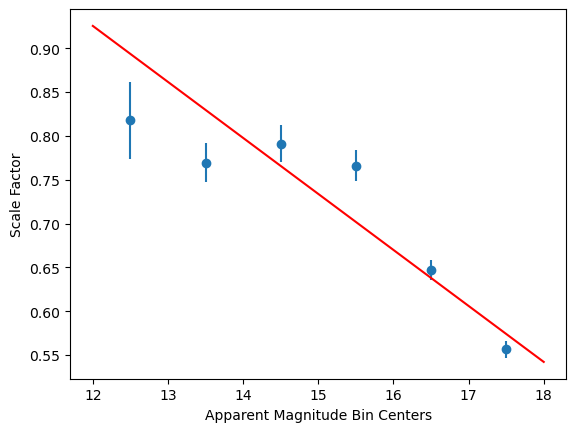

In [19]:
x = np.array(bincenters)
y = np.array(sigma_values)
y_err = np.array(scale_errors)

params, _ = curve_fit(line, x, y, sigma = y_err, absolute_sigma = True)

a_fit, b_fit = params

equation = f"scale = {a_fit:.8f} * rmag + {b_fit:.8f}"
print(equation)

x_fit = np.linspace(12, 18, 100)
y_fit = line(x_fit, a_fit, b_fit)

plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'Bootstrapped Errors')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('Apparent Magnitude Bin Centers')
plt.ylabel('Scale Factor')
plt.show()


In [20]:
scale = a_fit * rmag + b_fit
e_tab_corr = e_tab*scale
corr_err_ratio = delta_z_corr/e_tab_corr

In [21]:
print(np.std(corr_err_ratio))

1.1376561614719094


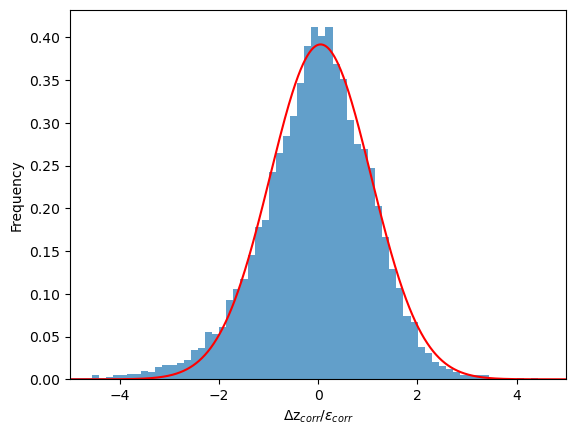

σ = 1.018800753413199
mean = 0.047009230981078176


In [22]:
hist, bins = np.histogram(corr_err_ratio, bins=800, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = curve_fit(gauss, bin_centers, hist)

mean, sigma = popt

xval = np.linspace(-5, 5, 1000)

plt.hist(corr_err_ratio, bins=100, density=True, alpha=0.7, label='$\Delta$z_corr/e_tab_corr')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z$_{corr}$/$\epsilon_{corr}$')
plt.ylabel('Frequency')
plt.xlim(-5,5)
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)

scale = -0.01579765 * rmag^2 + 0.42854851 * rmag + -2.10844271


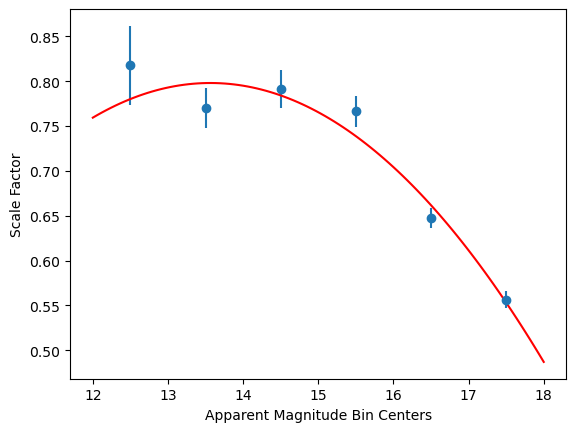

In [23]:
## testing a second order fit
def parabola(x, a, b, c):
    y = a*(x**2) + b*x + c
    return y

x = np.array(bincenters)
y = np.array(sigma_values)
y_err = np.array(scale_errors)

initial_guess = (0.01, -0.5, 0.1)

params, _ = curve_fit(parabola, x, y, sigma = y_err, absolute_sigma = True, p0 = initial_guess)

a_fit, b_fit, c_fit = params

equation = f"scale = {a_fit:.8f} * rmag^2 + {b_fit:.8f} * rmag + {c_fit:.8f}"
print(equation)

x_fit = np.linspace(12, 18, 100)
y_fit = parabola(x_fit, a_fit, b_fit, c_fit)

plt.errorbar(x, y, yerr = y_err, fmt = 'o', label = 'Bootstrapped Errors')
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
plt.xlabel('Apparent Magnitude Bin Centers')
plt.ylabel('Scale Factor')
plt.show()

In [24]:
print(sigma_values)

[0.817708863572243, 0.7696309176232539, 0.7912628889622217, 0.7662205641846241, 0.6474178246791237, 0.556445474804657]


In [25]:
scaletest = a_fit * (rmag**2) + b_fit * rmag + c_fit
e_tab_corr_test = e_tab*scaletest
corr_err_ratio_test1 = delta_z_corr/e_tab_corr_test

In [26]:
print(np.std(corr_err_ratio_test1))

1.126950035358353


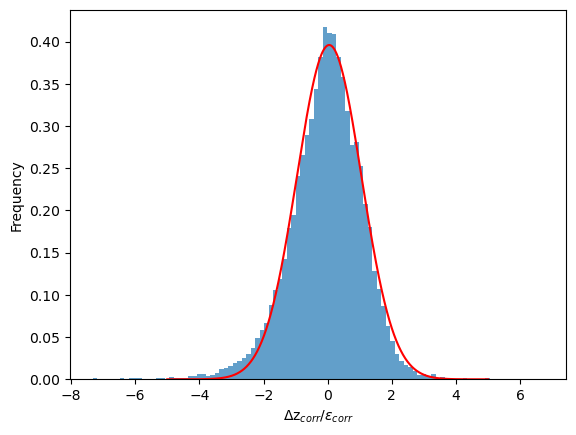

σ = 1.0072812650343828
mean = 0.04597614137224636


In [27]:
hist, bins = np.histogram(corr_err_ratio_test1, bins=800, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = curve_fit(gauss, bin_centers, hist)

mean, sigma = popt

xval = np.linspace(-5, 5, 1000)

plt.hist(corr_err_ratio_test1, bins=100, density=True, alpha=0.7, label='$\Delta$z_corr/e_tab_corr_test')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z$_{corr}$/$\epsilon_{corr}$')
plt.ylabel('Frequency')
#plt.xlim(-0.05,0.05)
#plt.legend()
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)

scale = -0.00155264 * rmag + 0.80656506 for x < 15.30
scale = -0.10186090 * rmag + 2.33614313 for x >= 15.30


/afs/cas.unc.edu/users/z/h/zhutchen/.conda/envs/astro2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


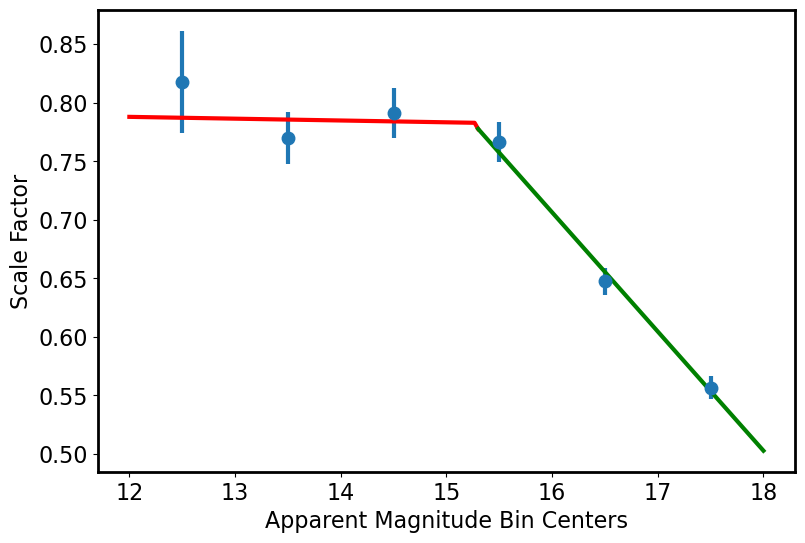

In [28]:
## Fit used ##

def piecewise_line(x, a1, b1, a2, b2, x_break):
    return np.piecewise(x, [x < x_break, x >= x_break],
                        [lambda x: a1*x + b1, lambda x: a2*x + b2])

bincenters = [12.5, 13.5, 14.5, 15.5, 16.5, 17.5]
x = np.array(bincenters)
y = np.array(sigma_values)
y_err = np.array(scale_errors)

initial_guess = [1.0, 1.0, 1.0, 1.0, 15.3]  # [a1, b1, a2, b2, x_break]

params, _ = curve_fit(piecewise_line, x, y, sigma=y_err, p0=initial_guess, absolute_sigma=True)

a1_fit, b1_fit, a2_fit, b2_fit, x_break_fit = params

equation1 = f"scale = {a1_fit:.8f} * rmag + {b1_fit:.8f} for x < {x_break_fit:.2f}"
equation2 = f"scale = {a2_fit:.8f} * rmag + {b2_fit:.8f} for x >= {x_break_fit:.2f}"
print(equation1)
print(equation2)

x_fit1 = np.linspace(12, x_break_fit, 100)
y_fit1 = piecewise_line(x_fit1, a1_fit, b1_fit, a2_fit, b2_fit, x_break_fit)

x_fit2 = np.linspace(x_break_fit, 18, 100)
y_fit2 = piecewise_line(x_fit2, a1_fit, b1_fit, a2_fit, b2_fit, x_break_fit)

plt.figure(figsize = (9,6))
plt.errorbar(x, y, yerr=y_err, fmt='o', markersize = 9, linewidth = 3, label='Bootstrapped Errors')
plt.plot(x_fit1, y_fit1, color='red', linewidth = 3, label='Fitted Curve 1')
plt.plot(x_fit2, y_fit2, color='green', linewidth = 3, label='Fitted Curve 2')
plt.xlabel('Apparent Magnitude Bin Centers', fontsize = 16)
plt.ylabel('Scale Factor', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
#plt.legend()
plt.show()


panelcstuff = {'x':x, 'y':y, 'y_err':y_err, 'x_fit1':x_fit1, 'y_fit1':y_fit1, 'x_fit2':x_fit2, 'y_fit2':y_fit2}
pickle.dump(panelcstuff, open('panelcstuff.pkl','wb'))

In [29]:
scale1 = a1_fit * rmag + b1_fit
scale2 = a2_fit * rmag + b2_fit
if (rmag < 15.3).any():
    e_tab_corr_test = e_tab * scale1
elif (rmag >= 15.3).any():
    e_tab_corr_test = e_tab * scale2

corr_err_ratio_test2 = delta_z_corr/e_tab_corr_test

In [30]:
print(np.std(corr_err_ratio_test2))

0.9993904169474911


In [31]:
print(corr_err_ratio_test2)

0       -0.179456
1       -0.046777
2       -0.555201
3        0.072699
4        0.045162
           ...   
14643    0.015190
14644    0.893059
14645    0.916139
14646   -0.248156
14647    0.406661
Length: 13772, dtype: float64


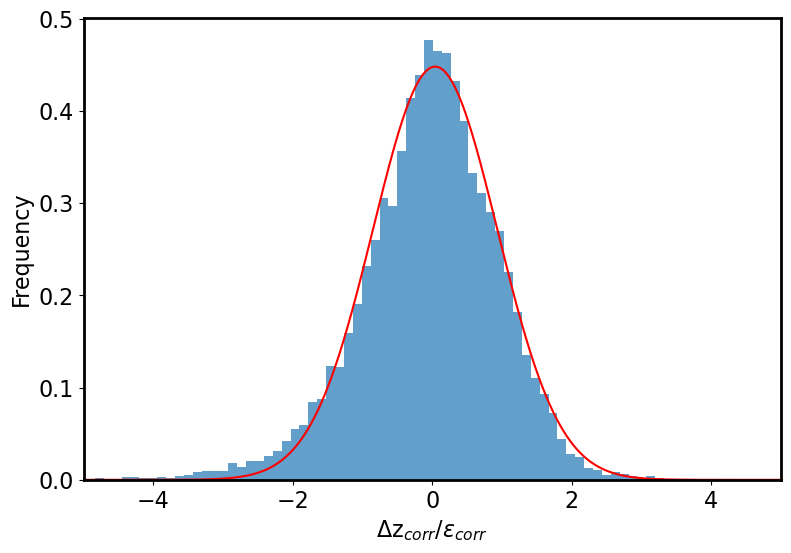

σ = 0.8902973296146794
mean = 0.04096358464066629


In [32]:
hist, bins = np.histogram(corr_err_ratio_test2, bins=800, density=True)

bin_centers = (bins[:-1] + bins[1:]) / 2

popt, pcov = curve_fit(gauss, bin_centers, hist)

mean, sigma = popt

xval = np.linspace(-5, 5, 1000)

plt.figure(figsize = (9,6))
plt.hist(corr_err_ratio_test2, bins=100, density=True, alpha=0.7, label='$\Delta$z_corr/e_tab_corr_test')
plt.plot(xval, gauss(xval, mean, sigma), color='red')
plt.xlabel('$\Delta$z$_{corr}$/$\epsilon_{corr}$', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xlim(-5,5)
#plt.legend()
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.show()
print('\u03C3 =', sigma)
print('mean =', mean)

In [33]:
#other plots of things

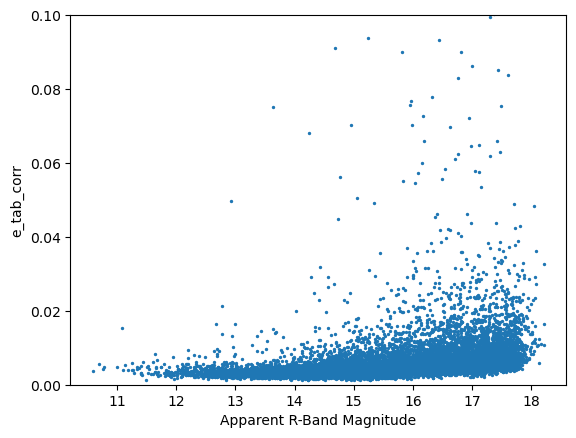

In [34]:
plt.scatter(rmag, e_tab_corr_test, s = 2)
plt.xlabel('Apparent R-Band Magnitude')
plt.ylabel('e_tab_corr')
plt.ylim(0,0.1)
plt.show()

In [35]:
#making the dataframe for Zack

In [36]:
all_match['photo_z_corr'] = photoz_corr*3e5
all_match['e_tab_corr'] = e_tab_corr_test*3e5   #from the piecewise fit for now (fixed units)
all_match['e_tab'] = e_tab * 3e5
all_match['z_phot_median'] = photo_z * 3e5

In [37]:
eco_resb_photoz = pd.DataFrame()
eco_resb_photoz.loc[:,'name'] = all_match.loc[:,'name']
eco_resb_photoz.loc[:,'spec_z'] = all_match.loc[:, 'cz']  #is in km/s units
eco_resb_photoz.loc[:,'photo_z'] = all_match.loc[:,'z_phot_median']
eco_resb_photoz.loc[:, 'photo_z_corr'] = all_match.loc[:,'photo_z_corr']
eco_resb_photoz.loc[:,'e_tab'] = all_match.loc[:,'e_tab']
eco_resb_photoz.loc[:,'e_tab_corr'] = all_match.loc[:,'e_tab_corr']  #from piecewise fit, using gaussian stddev

In [38]:
eco_resb_photoz.head(5)

,name,spec_z,photo_z,photo_z_corr,e_tab,e_tab_corr
0,ECO13218,4995.380486,5353.5,4339.036759,4690.2,3657.398808
1,ECO02822,6805.777192,7600.8,6739.494903,1814.4,1416.994269
2,ECO00207,3665.057389,3835.2,3012.336180,1504.8,1175.649484
3,ECO11747,6772.449470,7311.3,6824.898521,920.4,721.453992
4,ECO02809,6865.686588,8078.7,7193.116201,9285.6,7250.056742


# Figure for Zack's paper 3

In [39]:
from matplotlib.ticker import MaxNLocator, AutoLocator
from matplotlib import rcParams
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['font.family'] = 'sans-serif'
rcParams['grid.color'] = 'k'
rcParams['grid.linewidth'] = 0.2
my_locator = MaxNLocator(6)
singlecolsize = (3.3522420091324205, 2.0717995001590714)
doublecolsize = (7.500005949910059, 4.3880449973709)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

0.3427931194494212 0.7466769160685139


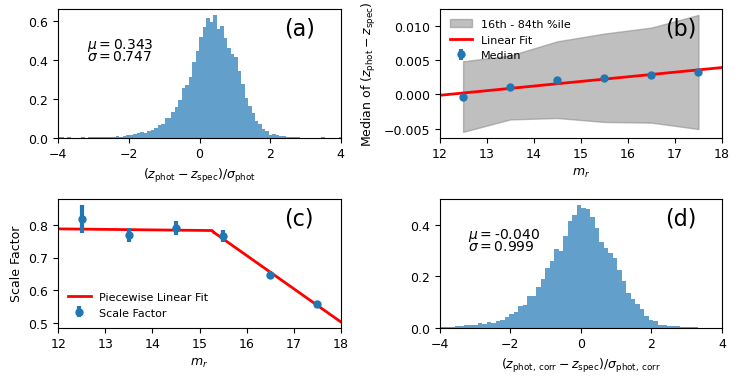

In [41]:
fig, axs=plt.subplots(ncols=2, nrows=2, figsize=(doublecolsize[0], 0.9*doublecolsize[1]))


axs[0][0].hist(ratio_0, bins=100, density=True, alpha=0.7, label='$\Delta$z/$\epsilon$')
#axs[0][0].plot(xval, gauss(xval, mean, sigma), color='red')
axs[0][0].set_xlabel(r'$(z_{\rm phot} - z_{\rm spec})/\sigma_{\rm phot}$', fontsize = 9)
#plt.title('all values of surface brightness')
axs[0][0].set_xlim(-4,4)
axs[0][0].annotate(xy=(0.8,0.8),xycoords='axes fraction',text='(a)',fontsize=16)
axs[0][0].annotate(xy=(0.1,0.7),xycoords='axes fraction', text=r'$\mu =$'+'{:0.3f}'.format(np.mean(ratio_0)))
axs[0][0].annotate(xy=(0.1,0.6),xycoords='axes fraction', text=r'$\sigma =$'+'{:0.3f}'.format(np.std(ratio_0)))
print(np.mean(ratio_0),np.std(ratio_0))

panelb=pickle.load(open('panelbstuff.pkl','rb'))
axs[0][1].errorbar(panelb['x'], panelb['y'], yerr = panelb['y']*0, fmt = 'o', linewidth = 3, markersize = 5, label = 'Median')
axs[0][1].fill_between(panelb['x'], panelb['y']-panelb['y_err'], panelb['y']+panelb['y_err'], color='gray',alpha=0.5, label='16th - 84th %ile')
axs[0][1].plot(panelb['x_fit'], panelb['y_fit'], color='red', linewidth = 2, label='Linear Fit')
axs[0][1].set_xlabel(r'$m_r$', fontsize = 9)
axs[0][1].set_ylabel(r'Median of $(z_{\rm phot} - z_{\rm spec})$', fontsize = 9)
axs[0][1].legend(loc='upper left',fontsize=8,framealpha=0)
axs[0][1].set_xlim(min(panelb['x_fit']), max(panelb['x_fit']))
axs[0][1].annotate(xy=(0.8,0.8),xycoords='axes fraction',text='(b)',fontsize=16)

panelc=pickle.load(open('panelcstuff.pkl','rb'))
axs[1][0].errorbar(panelc['x'], panelc['y'], yerr = panelc['y_err'], fmt = 'o', linewidth = 3, markersize = 5, label = 'Scale Factor')
axs[1][0].plot(panelc['x_fit1'], panelc['y_fit1'], color='red', linewidth = 2, label='Piecewise Linear Fit',zorder=0)
axs[1][0].plot(panelc['x_fit2'], panelc['y_fit2'], color='red', linewidth = 2, zorder=0)
axs[1][0].set_xlabel(r'$m_r$', fontsize = 9)
axs[1][0].set_ylabel(r'Scale Factor', fontsize = 9)
axs[1][0].legend(loc='lower left',fontsize=8,framealpha=0)
axs[1][0].set_xlim(min(panelc['x_fit1']), max(panelc['x_fit2']))
axs[1][0].annotate(xy=(0.8,0.8),xycoords='axes fraction',text='(c)',fontsize=16)

axs[1][1].hist(corr_err_ratio_test2, bins=100, density=True, alpha=0.7, label='$\Delta$z_corr/e_tab_corr_test')
#axs[1][1].plot(xval, gauss(xval, mean, sigma), color='red')
axs[1][1].set_xlabel(r'$(z_{\rm phot,\, corr} - z_{\rm spec})/\sigma_{\rm phot,\, corr}$', fontsize = 9)
axs[1][1].annotate(xy=(0.1,0.7),xycoords='axes fraction', text=r'$\mu =$'+'{:0.3f}'.format(np.mean(corr_err_ratio_test2)))
axs[1][1].annotate(xy=(0.1,0.6),xycoords='axes fraction', text=r'$\sigma =$'+'{:0.3f}'.format(np.std(corr_err_ratio_test2)))
axs[1][1].set_xlim(-4,4)
axs[1][1].annotate(xy=(0.8,0.8),xycoords='axes fraction',text='(d)',fontsize=16)


plt.tight_layout()
plt.savefig("../figures/hannah_desi_calibration.pdf",dpi=300)
plt.show()

In [ ]:
#eco_resb_photoz.to_csv('eco_resb_decals_photoz.csv', index = False)

### USING THE PIECEWISE FUNC FOR PLOTS FOR POSTER

In [ ]:
df = pd.read_csv('/srv/one/hperk4/eco_resb_decals_photoz.csv')

In [ ]:
#first plot: scatter plot between spec-z and photo-z

In [ ]:
plt.figure(figsize = (9,6))
plt.scatter(df['spec_z'], df['photo_z'], color = 'red', s = 2, label = "Uncorrected")
plt.scatter(df['spec_z'], df['photo_z_corr'], color = 'blue', s = 2, label = "Corrected")
plt.axline((0,0), slope = 1, color = 'black', linestyle = '--', linewidth = 3)
plt.xlabel('Spec-z', fontsize = 16)
plt.ylabel('Photo-z (Corrected and Uncorrected)', fontsize = 16)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlim(2000,8000)
plt.ylim(0,20000)
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=14)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.show()

In [ ]:
import matplotlib.patches as mpatches
#tried a contour plot, works much better than the scatter one
plt.figure(figsize = (9,6))
sns.kdeplot(y = df['photo_z'], x = df['spec_z'], levels = 5, color = 'blue', fill = True, shade = True, label = 'Non-Corrected Photo-z (km/s)')
sns.kdeplot(y = df['photo_z_corr'], x = df['spec_z'], levels = 5, color = 'red', label = "Corrected Photo-z (km/s)")
plt.axline((0,0), slope = 1, color = 'black', linestyle = '--', linewidth = 3)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.ylim(0,16000)
plt.xlim(2000,8000)
plt.ylabel('Photo-z (km/s)', fontsize = 18)
plt.xlabel('Spec-z (km/s)', fontsize = 18)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)

blue_patch = mpatches.Patch(color='blue', label='Non-Corrected Photo-z')
red_patch = mpatches.Patch(color='red', label='Corrected Photo-z')
plt.legend(handles=[blue_patch, red_patch], loc="upper left", fontsize=14)
#plt.tight_layout()
#plt.savefig(fname = 'photz_corrected.png')
plt.show()


In [ ]:
#### plots for scaling the errors

In [ ]:
x_corr = e_tab_corr
y = np.abs(photoz_corr - spec_z)
x = e_tab
plt.figure(figsize = (9,6))
plt.scatter(y, x, s = 2, color = 'red', alpha = 1, label = 'Reported Errors')
plt.scatter(y,x_corr, s = 2, color = 'blue', alpha = 1, label = "Corrected Errors")
plt.axline((0,0), slope = 1, linestyle = '--', color = 'black', linewidth = 3)
plt.xlim(0,0.04)
plt.ylim(0,0.04)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.ylabel('Reported Error', fontsize = 16)
plt.xlabel('(Photo-z - Spec-z)', fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.legend(fontsize = 12)
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
## trying out as a fractional y axis
x_corr = e_tab_corr
y_corr = ((photoz_corr - spec_z))/e_tab_corr    #how would this work with both being corrected?
x = e_tab
y = ((photoz_corr - spec_z))/e_tab
plt.figure(figsize = (9,6))
plt.scatter(x, y, s = 2, color = 'red', alpha = 1, label = 'Reported Errors')
plt.scatter(x_corr,y_corr, s = 2, color = 'blue', alpha = 1, label = "Corrected Errors")
plt.axline((0,1),slope = 0, linestyle = '--', color = 'black', linewidth = 3)
plt.xlim(0,0.05)
plt.ylim(-5,5)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.xlabel('Reported Error', fontsize = 16)
plt.xlabel('Reported Error', fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.legend(fontsize = 12)
lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=14)
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
plt.figure(figsize = (9,6))
x_corr = e_tab_corr    #probably need to use the values from the dataset that I sent Zack
y_corr = ((photoz_corr - spec_z))/e_tab_corr
x = e_tab
y = ((photoz_corr - spec_z))/e_tab
sns.kdeplot(y = y, x = x, levels = 5, color = 'blue', fill = True, shade = True, label = 'Non-Corrected Errors')
sns.kdeplot(y = y_corr, x = x_corr, levels = 5, color = 'red', label = "Corrected Errors")
plt.axline((0,0), slope = 0, color = 'black', linestyle = '--', linewidth = 3)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.ylim(-4,4)
plt.xlim(0,0.035)
plt.ylabel('(Photo-z - Spec-z)/Reported Error', fontsize = 18)
plt.xlabel('Reported Error', fontsize = 18)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)

blue_patch = mpatches.Patch(color='blue', label='Non-Corrected Errors')
red_patch = mpatches.Patch(color='red', label='Corrected Errors')
plt.legend(handles=[blue_patch, red_patch], loc="upper right", fontsize=14)
plt.tight_layout()
#plt.savefig(fname = 'error_corrected.png', dpi = 500)
plt.show()

In [ ]:
## trying with a contour plot instead
plt.figure(figsize= (9,6))
x_corr = e_tab_corr
y = np.abs(photoz_corr - spec_z)
x = e_tab
sns.kdeplot(y = y, x = x, levels = 9, color = 'blue', fill = True, shade = True, label = 'Non-Corrected Error')
sns.kdeplot(y = y, x = x_corr, levels = 9, color = 'red', label = "Corrected Error")
plt.axline((0,0), slope = 1, color = 'black', linestyle = '--', linewidth = 3)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.ylim(0,0.03)
plt.xlim(0,0.03)
plt.ylabel('|Photo-z - Spec-z|', fontsize = 18)
plt.xlabel('Reported Error', fontsize = 18)
plt.xticks(fontsize = 16, rotation = 45)
plt.yticks(fontsize = 16)
plt.setp(plt.gca().spines.values(), linewidth=2)
blue_patch = mpatches.Patch(color='blue', label='Non-Corrected Error')
red_patch = mpatches.Patch(color='red', label='Corrected Error')
plt.legend(handles=[blue_patch, red_patch], loc="upper left", fontsize=14)
plt.show()

In [ ]:
x = np.linspace(-5, 5, 1000)
mu = 0
sigma = 1
y = gauss(x, mu, sigma)
plt.figure(figsize = (9,6))
plt.plot(x, y, label='Gaussian', linewidth = 5)

plt.errorbar(mu, 0.25, xerr=1*sigma, fmt='none', ecolor='r', capsize=13, capthick = 2, linewidth = 5, label=f'1$\sigma$')
#plt.errorbar(mu, 0.05, xerr=2*sigma, fmt='none', ecolor='r', capsize=13, capthick = 2, linewidth = 5, label=f'2$\sigma$')
#plt.errorbar(mu, 0.004, xerr=3*sigma, fmt='none', ecolor='r', capsize=13, capthick = 2, linewidth = 5, label=f'3$\sigma$')

xpoint = [0]
ypoint = [0.40]
plt.plot(xpoint, ypoint, marker = 'o', markersize = 11, color = 'black')
plt.errorbar(mu, 0.4, xerr=1*sigma, fmt='none', ecolor='black', capsize=13, capthick = 2, linewidth = 5, label=f'1$\sigma$')

plt.xlabel('x', fontsize = 18)
plt.ylabel('Probability Density', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#plt.title('Gaussian Distribution with 1, 2, and 3 sigma bars')
plt.annotate('1$\sigma$, 68%', xy=(-0.67,0.2256), fontsize = 16)
#plt.annotate('$\sigma$ = 2, 95%', xy=(-0.87,0.058), fontsize = 16)
#plt.annotate('$\sigma$ = 3, 99.7%', xy=(-0.92,0.012), fontsize = 16)
plt.ylim(0,0.45)
plt.setp(plt.gca().spines.values(), linewidth=2)
plt.tight_layout()
#plt.savefig(fname = 'gaussian.png', dpi = 500)
plt.show()

In [ ]:
def line(x,a,b):
    y = a*x + b
    return y

x = np.array(bincenters)
y = np.array(median_values)
y_err = np.array(quad_errs)

params, _ = curve_fit(line, x, y, sigma = y_err, absolute_sigma = True)

a_fit, b_fit = params

equation = f"median = {a_fit:.8f} * rmag + {b_fit:.8f}"
print(equation)

x_fit = np.linspace(12, 18, 100)
y_fit = line(x_fit, a_fit, b_fit)

plt.figure(figsize = (9,6))
plt.errorbar(x, y, yerr = y_err, fmt = 'o', markersize = 10, label = 'Data with percentiles', capsize = 5, capthick = 3, linewidth = 3)
plt.plot(x_fit, y_fit, color='red', label='Fitted Curve', linewidth = 3)
plt.xlabel('Apparent Brightness', fontsize = 18)
plt.ylabel('Median of (photo z - spec z)', fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.gca().invert_xaxis()
plt.setp(plt.gca().spines.values(), linewidth=2)
#plt.annotate('16th&84th percentiles give error bars', xy = (12,0.01))
plt.tight_layout()
#plt.savefig(fname = 'medians.png', dpi = 500)
plt.show()